## Transformation on a cube

In [1]:
from itertools import combinations, product

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def get_rotation(a, axis=0):
    i, j = (axis + 1) % 3, (axis + 2) % 3
    rot = np.eye(4)
    rot[[i, j], [i, j]] = np.cos(np.deg2rad(a))
    rot[[i, j], [j, i]] = np.sin(np.deg2rad(a))
    rot[i, j] = -rot[i, j]
    return rot


def make_homogeneous_cube_edges(limit=[-1, 1]):
    edges = {}
    i = 0
    for start, end in combinations(np.array(list(product(limit, limit, limit))), 2):
        if np.sum(np.abs(start - end)) == limit[1] - limit[0]:
            start = np.hstack((start, 1))
            end = np.hstack((end, 1))
            edges[i] = np.column_stack((start, end))
            i = i + 1
    return edges

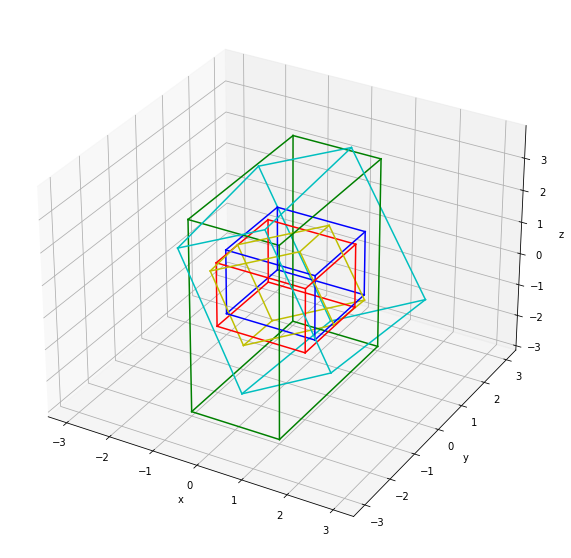

In [2]:
scale = np.diag((1, 2, 3, 1))

shift = np.eye(4)
shift[:3, 3] = np.array([0.1, 0.2, 0.3])

rot_x = get_rotation(20, axis=0)
rot_y = get_rotation(30, axis=1)
rot_z = get_rotation(50, axis=2)
rotation = rot_x @ rot_y @ rot_z

edges = make_homogeneous_cube_edges(limit=[-1, 1])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
for _, edge in edges.items():
    scaled_edge = scale @ edge
    shifted_edge = shift @ edge
    rotated_edge = rotation @ edge
    transformed_edge = shift @ rotation @ scale @ edge

    ax.auto_scale_xyz((-3, 3), (-3, 3), (-3, 3))
    ax.plot3D(*zip(edge[:3, 0], edge[:3, 1]), color="r")
    ax.plot3D(*zip(scaled_edge[:3, 0], scaled_edge[:3, 1]), color="g")
    ax.plot3D(*zip(shifted_edge[:3, 0], shifted_edge[:3, 1]), color="b")
    ax.plot3D(*zip(rotated_edge[:3, 0], rotated_edge[:3, 1]), color="y")
    ax.plot3D(*zip(transformed_edge[:3, 0], transformed_edge[:3, 1]), color="c")
ax.set_xlabel("x")
ax.set_ylabel("y")
_ = ax.set_zlabel("z")

In [3]:
np.set_printoptions(precision=3)
print(f"rotation_x:")
print(rot_x)
print(f"rotation_y:")
print(rot_x)
print(f"rotation_z:")
print(rot_z)
print(f"rotation:")
print(rotation)
print(f"shift:")
print(shift)
print(f"scale:")
print(scale)
print(f"shift and scale:")
print(shift @ scale)
print(f"shift, rotation scale:")
print(shift @ rotation @ scale)

rotation_x:
[[ 1.     0.     0.     0.   ]
 [ 0.     0.94  -0.342  0.   ]
 [ 0.     0.342  0.94   0.   ]
 [ 0.     0.     0.     1.   ]]
rotation_y:
[[ 1.     0.     0.     0.   ]
 [ 0.     0.94  -0.342  0.   ]
 [ 0.     0.342  0.94   0.   ]
 [ 0.     0.     0.     1.   ]]
rotation_z:
[[ 0.643 -0.766  0.     0.   ]
 [ 0.766  0.643  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]
rotation:
[[ 0.557 -0.663  0.5    0.   ]
 [ 0.83   0.473 -0.296  0.   ]
 [-0.04   0.58   0.814  0.   ]
 [ 0.     0.     0.     1.   ]]
shift:
[[1.  0.  0.  0.1]
 [0.  1.  0.  0.2]
 [0.  0.  1.  0.3]
 [0.  0.  0.  1. ]]
scale:
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 1]]
shift and scale:
[[1.  0.  0.  0.1]
 [0.  2.  0.  0.2]
 [0.  0.  3.  0.3]
 [0.  0.  0.  1. ]]
shift, rotation scale:
[[ 0.557 -1.327  1.5    0.1  ]
 [ 0.83   0.946 -0.889  0.2  ]
 [-0.04   1.16   2.441  0.3  ]
 [ 0.     0.     0.     1.   ]]
